In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lets Create data
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [5]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [6]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [7]:
# Lets build our model_1 with 1 layer and 100 epochs

tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 71.0820 - mae: 71.0820
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 35.8376 - mae: 35.8376
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6572 - mae: 7.6572
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6793 - mae: 9.6793
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1211 - mae: 11.1211
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2719 - mae: 10.2719
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.2764 - mae: 9.2764
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.1931 - mae: 9.1931
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 11.8326 - mae: 11.8326
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.7665 - mae: 13.7665
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

In [8]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 60ms/step


array([[ 74.59939 ],
       [ 79.488266],
       [ 84.377144],
       [ 89.26602 ],
       [ 94.15489 ],
       [ 99.04377 ],
       [103.93265 ],
       [108.82152 ],
       [113.710396],
       [118.59927 ]], dtype=float32)

In [13]:
# Lets create a plotting function

def plot_preds(train_data = X_train,
               test_data = X_test,
               train_labels = y_train,
               test_labels = y_test,
               predictions = y_pred_1):
    
    # Plot training data, testing data and compare predictions to ground truth labels
    
    plt.figure(figsize=(15,10))
    
    # Plot the training data in lime(light green)
    plt.scatter(train_data, train_labels, label="Training Data", c = "lime")
    
    # plot the testing data in cyan
    plt.scatter(test_data, test_labels, label="Testing Data", c="cyan")
    
    # plot the predictions in orange
    plt.scatter(test_data, predictions, label="Predictions", c="orange")
    
    # legend
    plt.legend()
    
    plt.show()

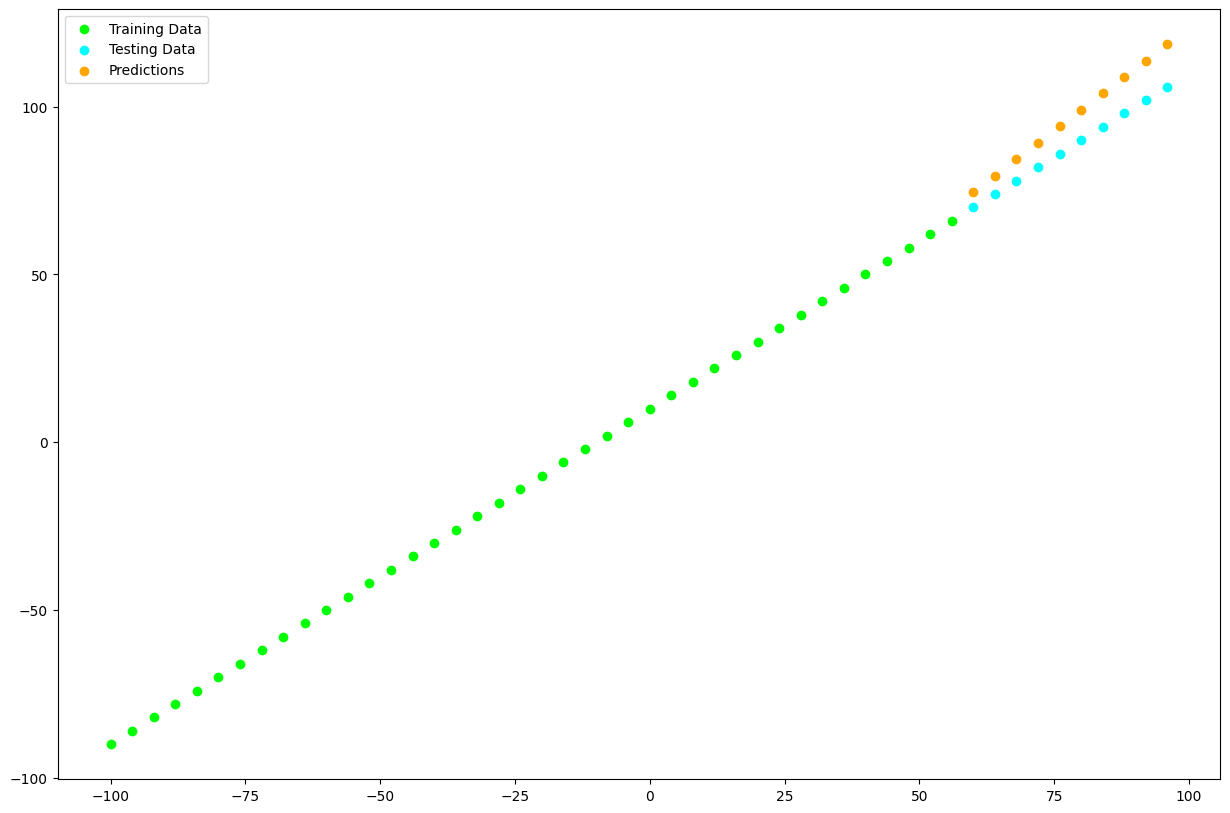

In [14]:
# Plot the predictions for the model
plot_preds(predictions=y_pred_1)

In [27]:
y_true = y_test
y_true

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [31]:
# Calculate model_1 evaluation metrics

# Lets build function to calculate mae

def mae(y_true, y_pred):
    return tf.keras.metrics.mean_absolute_error(y_true, y_pred)

# Lets build a function to calculate mse
def mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(y_true, y_pred)

In [32]:
tf.constant(y_pred_1), tf.squeeze(y_pred_1) # adjusted dimension

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 74.59939 ],
        [ 79.488266],
        [ 84.377144],
        [ 89.26602 ],
        [ 94.15489 ],
        [ 99.04377 ],
        [103.93265 ],
        [108.82152 ],
        [113.710396],
        [118.59927 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 74.59939 ,  79.488266,  84.377144,  89.26602 ,  94.15489 ,
         99.04377 , 103.93265 , 108.82152 , 113.710396, 118.59927 ],
       dtype=float32)>)

In [33]:
mae_1 = mae(y_test, tf.squeeze(y_pred_1)) # adjusting dimensions
mse_1 = mse(y_test, tf.squeeze(y_pred_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.599332>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.466835>)

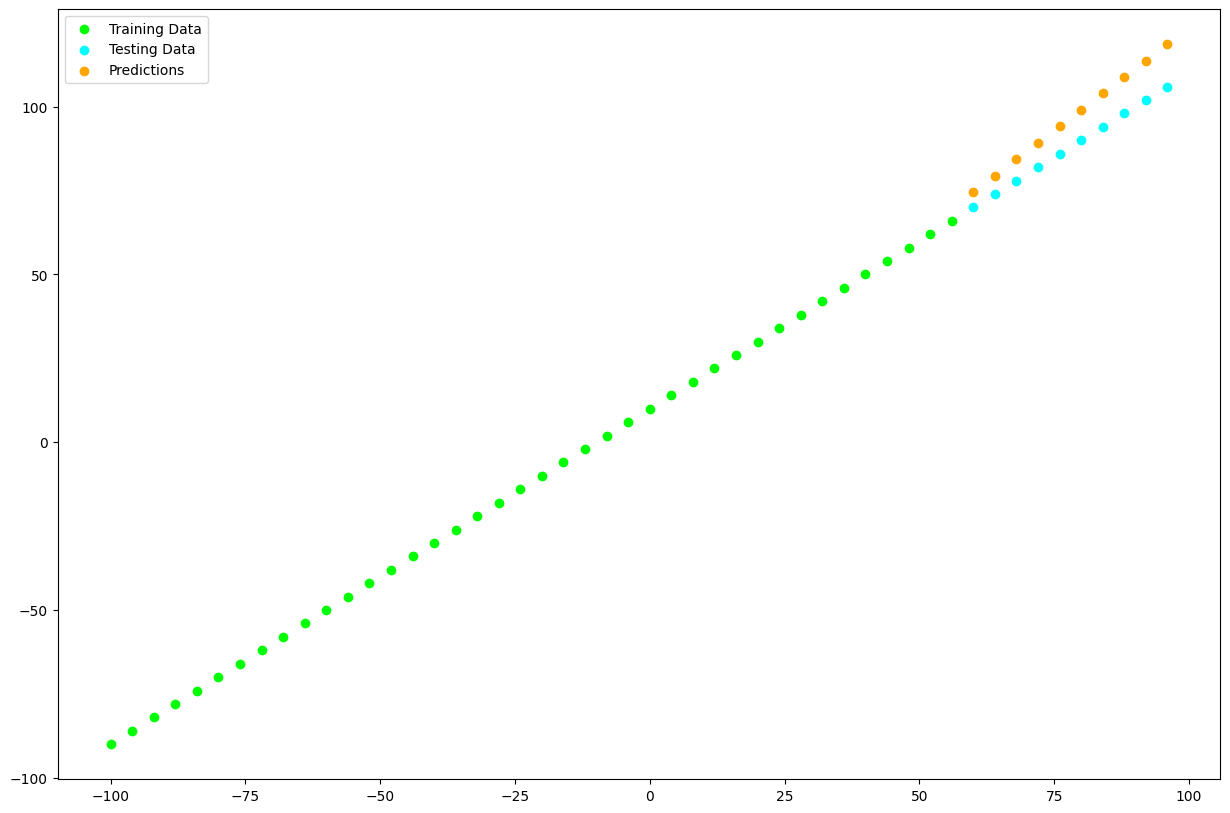

In [34]:
# plot
plot_preds(predictions=y_pred_1) 